In [7]:
import Pkg;

Pkg.add("ForwardDiff")  
Pkg.add("LinearAlgebra")
Pkg.add("Plots")

Pkg.status()

   Resolving package versions...
    Updating `C:\Users\Mohammad\.julia\environments\v1.6\Project.toml`
  [f6369f11] + ForwardDiff v0.10.35
    Updating `C:\Users\Mohammad\.julia\environments\v1.6\Manifest.toml`
  [bbf7d656] + CommonSubexpressions v0.3.0
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.0
  [f6369f11] + ForwardDiff v0.10.35
  [90137ffa] + StaticArrays v1.5.25
  [1e83bf80] + StaticArraysCore v1.4.0
   Resolving package versions...
    Updating `C:\Users\Mohammad\.julia\environments\v1.6\Project.toml`
  [37e2e46d] + LinearAlgebra
  No Changes to `C:\Users\Mohammad\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Mohammad\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\Mohammad\.julia\environments\v1.6\Manifest.toml`


      Status `C:\Users\Mohammad\.julia\environments\v1.6\Project.toml`
  [f6369f11] ForwardDiff v0.10.35
  [7073ff75] IJulia v1.24.0
  [91a5bcdd] Plots v1.38.15
  [37e2e46d] LinearAlgebra


In [9]:
import ForwardDiff as fd
import Plots as pd
using LinearAlgebra

In [13]:
function dynamics(x)
  l = 1
  g = 9.98    
  ẋ1 = x[2]  
  ẋ2 = -(g/l)*sin(x[1])  
    
  return [ẋ1;ẋ2]    
end

dynamics (generic function with 1 method)

In [19]:
function forward_euler(fun, x0, Tf, h)
    t = 0:h:Tf
    x_hist = zeros(length(x0),length(t))
    x_hist[:,1] .= x0
    for k = 1:(length(t)-1)
        x_hist[:,k+1] = x_hist[:,k] + h*fun(x_hist[:,k]) 
    end
    
    return x_hist, t
    
end

forward_euler (generic function with 1 method)

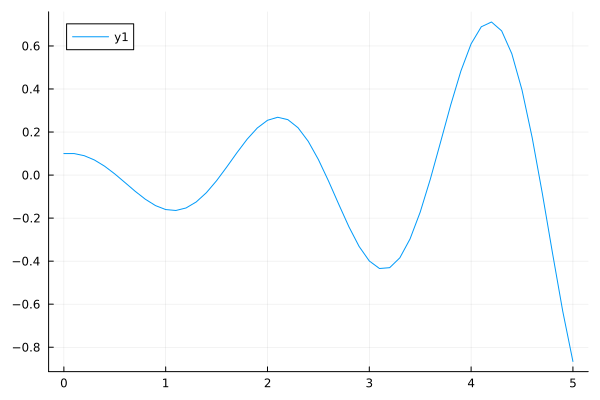

In [26]:
x0 = [.1; 0]
x_hist1, t_hist1 = forward_euler(dynamics, x0, 5, .1)
pd.plot(t_hist1, x_hist1[1,:])

In [30]:
function rk4_cal(xk, h)
    f1 = dynamics(xk)
    f2 = dynamics(xk + 0.5*h*f1)
    f3 = dynamics(xk + 0.5*h*f2)
    f4 = dynamics(xk + h*f3)
    return xk + (h/6.0)*(f1 + 2*f2 + 2*f3 + f4)
end

rk4_cal (generic function with 1 method)

In [31]:
function rk4(fun, x0, Tf, h)
    t = 0:h:Tf
    x_hist = zeros(length(x0),length(t))
    x_hist[:,1] .= x0
    for k = 1:(length(t)-1)
        x_hist[:,k+1] = rk4_cal(x_hist[:,k], h)
    end
    return x_hist, t
end

rk4 (generic function with 1 method)

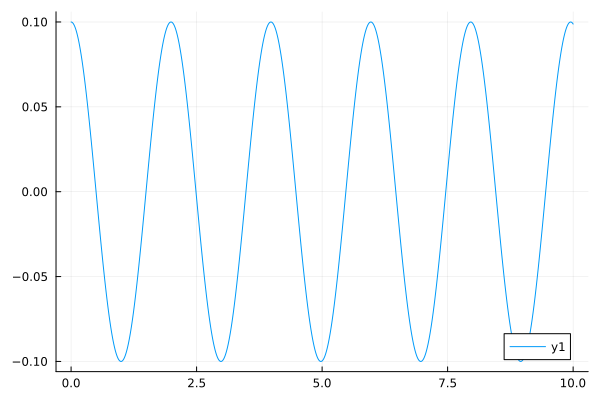

In [34]:
x0 = [.1; 0]
x_hist1, t_hist1 = rk4(dynamics, x0, 10, .01)
pd.plot(t_hist1, x_hist1[1,:])

In [37]:
function euler_backward(fun, x0, Tf, h)
    t = 0:h:Tf
    x_hist = zeros(length(x0),length(t))
    x_hist[:,1] .= x0
    
    for k = 1:(length(t)-1)
        e = 1
        x_hist[:,k+1] = x_hist[:,k]
        while e > 1e-8
            xn = x_hist[:,k] + h.*fun(x_hist[:,k+1])
            e = norm(xn - x_hist[:,k+1])
            x_hist[:,k+1] .= xn
        end
    end
    
    return x_hist, t
end 

euler_backward (generic function with 1 method)

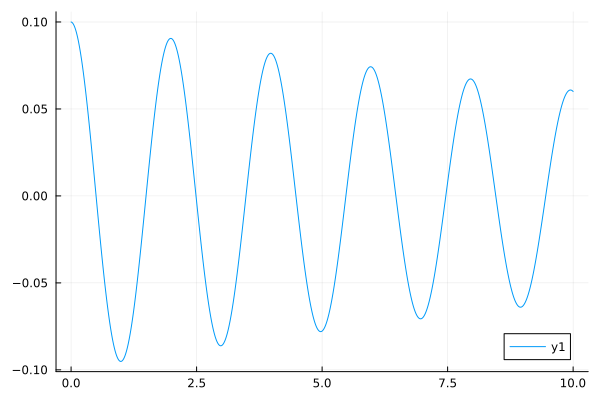

In [38]:
x0 = [.1; 0]
x_hist1, t_hist1 = euler_backward(dynamics, x0, 10, .01)
pd.plot(t_hist1, x_hist1[1,:])